<a href="https://colab.research.google.com/github/omarahmed93/Amit/blob/main/project_grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sn
import tensorflow as tf
import cv2
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Activation,Conv2D,Dense,MaxPool2D,Flatten,Dropout

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/A_Z Handwritten Data.csv")

In [ ]:
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


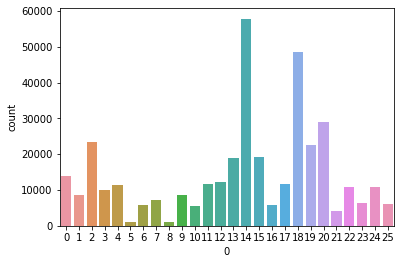

In [ ]:
sn.countplot(data.iloc[:,0])

In [ ]:
ddata=data.iloc[:,1:]

In [ ]:
images=[]
for i in range(len(ddata)):
  img=np.array(ddata.iloc[i,:]).reshape(28,28)
  images.append(img)
  
  
  



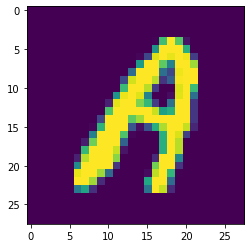

In [ ]:
plt.imshow(images[0000])

In [ ]:
target=data.iloc[:,0]

In [ ]:
target=np.array(target)
target.shape

(372450,)

In [ ]:
target=target.reshape(-1,1)
target.shape


(372450, 1)

In [ ]:
images=np.array(images)

In [ ]:
images.shape

(372450, 28, 28)

In [ ]:
trainx,testx,trainy,testy=train_test_split(images,target)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Conv2D,Dense,MaxPool2D,Flatten,Dropout
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(.1))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1024,activation='relu'))
model.add(Dense(26,activation='softmax'))
model.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 3, 3, 128)         0

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
trainx=trainx/255

In [ ]:
trainy.shape

(279337, 1)

In [ ]:
history=model.fit(trainx,trainy,epochs=15,steps_per_epoch=30,shuffle=True,validation_split=0.1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


30/30 [==============================] - 173s 6s/step - loss: 1.9254 - accuracy: 0.4687 - val_loss: 0.7466 - val_accuracy: 0.7798
Epoch 2/15
30/30 [==============================] - 171s 6s/step - loss: 0.4533 - accuracy: 0.8675 - val_loss: 0.2260 - val_accuracy: 0.9356
Epoch 3/15
30/30 [==============================] - 169s 6s/step - loss: 0.1914 - accuracy: 0.9449 - val_loss: 0.1257 - val_accuracy: 0.9655
Epoch 4/15
30/30 [==============================] - 171s 6s/step - loss: 0.1251 - accuracy: 0.9646 - val_loss: 0.0935 - val_accuracy: 0.9737
Epoch 5/15
30/30 [==============================] - 168s 6s/step - loss: 0.1021 - accuracy: 0.9705 - val_loss: 0.0814 - val_accuracy: 0.9766
Epoch 6/15
30/30 [==============================] - 168s 6s/step - loss: 0.0866 - accuracy: 0.9755 - val_loss: 0.0662 - val_accuracy: 0.9812
Epoch 7/15
30/30 [==============================] - 168s 6s/step - loss: 0.0754 - accuracy: 0.9784 - val_loss: 0.0635 - val_accuracy: 0.9811
Epoch 8/15
30/30 [======

In [ ]:
trainx=trainx.reshape(279337,28,28,1)

Text(0.5, 0, 'epochs')

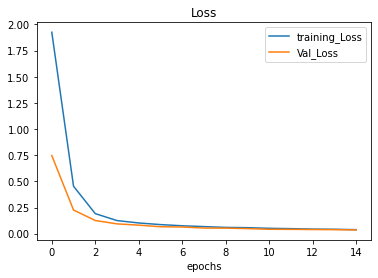

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

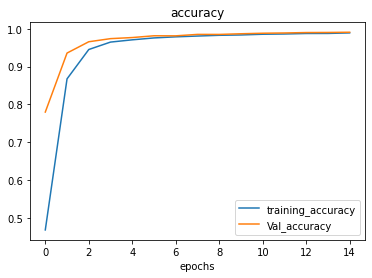

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [ ]:
test_loss, test_acc = model.evaluate(trainx,trainy, verbose=2)
print("test accurecy without augmentation")
print(test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8730/8730 - 100s - loss: 0.0293 - accuracy: 0.9917 - 100s/epoch - 11ms/step
test accurecy without augmentation
0.9917447566986084


In [ ]:
y_pred=model.predict(testx)

In [ ]:
y_pred[500]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

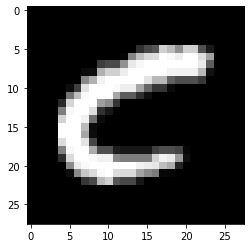

In [ ]:
plt.imshow(testx[500],cmap='gray')

In [ ]:
model.save_weights("mamodel.h5")

In [3]:
from tensorflow.keras import Sequential
model=Sequential()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
foladers_of_images=os.listdir("/content/drive/MyDrive/New folder - Copy")
foladers_of_images

['W',
 'Y',
 'Q',
 'T',
 'S',
 'V',
 'X',
 'Z',
 'U',
 'R',
 'O',
 'L',
 'I',
 'J',
 'M',
 'P',
 'G',
 'H',
 'N',
 'K',
 'B',
 'E',
 'D',
 'A',
 'C',
 'F']

In [8]:
main_path="/content/drive/MyDrive/New folder - Copy"
new_manual_images=[]
label_manual=[]
for lables in foladers_of_images:
  images_of_label=os.listdir(main_path+"/"+lables)
  for image in images_of_label:
    img=cv2.imread(main_path+"/"+lables+"/"+image)
    new_manual_images.append(img)
    label_manual.append(lables)

  
  

In [9]:
new_manual_images=np.array(new_manual_images)
label_manual=np.array(label_manual)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [10]:
new_manual_images[0].shape

(900, 1200, 3)

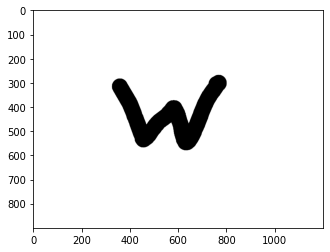

In [11]:
plt.imshow(new_manual_images[0],cmap='gray')

In [12]:
label_manual[0]

'W'

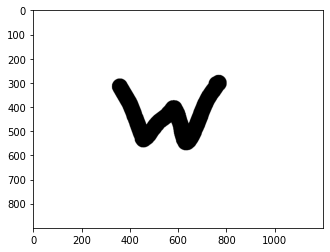

In [13]:
plt.imshow(cv2.cvtColor(new_manual_images[0],cv2.COLOR_BGR2GRAY),cmap='gray')

def imageprocessing(images):
  new_manual_images_resized=[]
  for i in images:
    img=cv2.resize(i,(28,28),1)
    new_manual_images_resized.append(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
  
  return new_manual_images_resized

(2544, 28, 28)


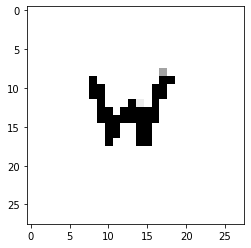

In [14]:
new_manual_images_resized=[]
new_manual_images_resized=imageprocessing(new_manual_images)
new_manual_images_resized=np.array(new_manual_images_resized)
plt.imshow(new_manual_images_resized[0],cmap='gray')
print(new_manual_images_resized.shape)

In [15]:
X_train, X_test, y_train, y_test=train_test_split(new_manual_images_resized,label_manual)

In [16]:
loaded_model = tf.keras.models.load_model("mamodel.h5")


In [17]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 3, 3, 128)         0

In [41]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
testmod=Sequential()

In [42]:
for i in loaded_model.layers[:-1]:
  testmod.add(i)



In [44]:
for i in testmod.layers:
  i.trainable=False

In [45]:
testmod.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 3, 3, 128)        

In [46]:
testmod.add(Dense(226,activation='softmax'))

In [53]:
testmod.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [54]:
history=testmod.fit(X_train,y_train.reshape(-1,1),epochs=15,steps_per_epoch=30,shuffle=True,validation_split=0.1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


UnimplementedError: ignored

In [49]:
y_train.shape

(1908,)

In [1]:
X_train[0]

NameError: ignored